In [1]:
import pandas as pd

/Users/phucbb/opt/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/computation/expressions.py:21: UserWarning: Pandas requires version '2.8.0' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/Users/phucbb/opt/miniconda3/envs/py39/lib/python3.9/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [6]:
from pathlib import Path
def default_cache_path():
    default = Path('./data')
    return default

In [8]:
path = default_cache_path()

!head -n5 data/BTC-2021min.csv

unix,date,symbol,open,high,low,close,Volume BTC,Volume USD
1646106180,2022-03-01 03:43:00,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.00000000,0.0
1646106060,2022-03-01 03:41:00,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.14297705,6154.673020989
1646106000,2022-03-01 03:40:00,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.00923000,397.0379569
1646105940,2022-03-01 03:39:00,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.82095000,35300.390268


In [11]:
df = pd.read_csv(path/'BTC-2021min.csv', parse_dates=['date'], index_col='date')
df.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2022-03-01 03:43:00,1646106180,BTC/USD,43046.58,43046.58,43046.58,43046.58,0.000000,0.000000
2022-03-01 03:41:00,1646106060,BTC/USD,43018.23,43046.59,43018.23,43046.58,0.142977,6154.673021
2022-03-01 03:40:00,1646106000,BTC/USD,43022.24,43022.24,43016.03,43016.03,0.009230,397.037957
2022-03-01 03:39:00,1646105940,BTC/USD,43035.16,43035.16,42999.44,42999.44,0.820950,35300.390268
2022-03-01 03:38:00,1646105880,BTC/USD,43077.82,43077.82,43049.46,43049.46,0.022210,956.143143


In [12]:
# convert timeseries frquency to 1 minute
df = df.asfreq('1T')
df.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2021-01-01 00:01:00,1.609459e+09,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.060397
2021-01-01 00:02:00,1.609459e+09,BTC/USD,29069.80,29073.02,29028.14,29035.89,3.030301,87987.499279
2021-01-01 00:03:00,1.609459e+09,BTC/USD,29037.68,29069.39,29019.00,29048.13,2.189621,63604.382387
2021-01-01 00:04:00,1.609459e+09,BTC/USD,29048.13,29057.73,29035.61,29045.19,1.446538,42014.959434
2021-01-01 00:05:00,1.609460e+09,BTC/USD,29021.86,29023.38,28982.33,28999.50,1.062360,30807.899250


<AxesSubplot:title={'center':'BTC Price 2021'}, xlabel='date'>

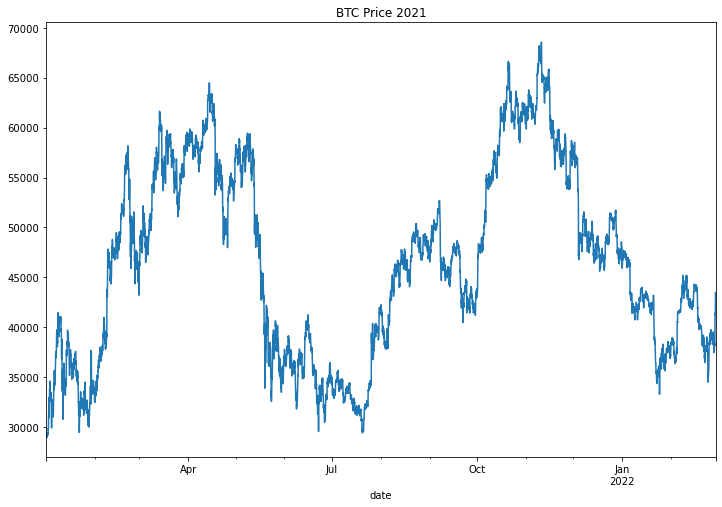

In [15]:
# Plot the data, sampling every 100th value
df.close[::100].plot(figsize=(12,8), title='BTC Price 2021')

In [16]:
# sampling every period, period could be a string like '1T', '1H', '1D', '1W', '1M', '1Y'
from typing import Union
from pandas.core.frame import DataFrame

def sampling(df: DataFrame, period: Union[str, int] = '1T'):
    # convert timeseries frquency to 1 minute
    return df.asfreq(period)

<AxesSubplot:title={'center':'BTC Price 2021'}, xlabel='date'>

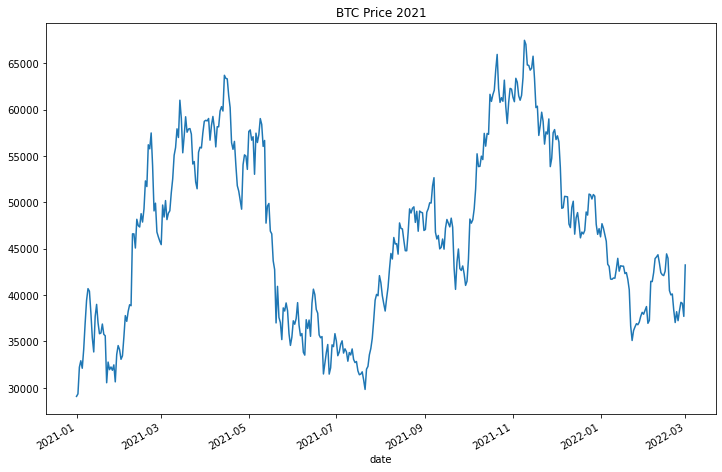

In [18]:
df_daily = sampling(df, '1D')
# Visualize the daily data
df_daily.close.plot(figsize=(12,8), title='BTC Price 2021')

In [19]:
# Sliding windows of n size
def sliding_windows(df: DataFrame, n: int = 10):
    return df.rolling(n)

In [22]:
df_daily.head()

,unix,symbol,open,high,low,close,Volume BTC,Volume USD
date,,,,,,,,
2021-01-01 00:01:00,1.609459e+09,BTC/USD,29007.31,29086.90,29007.31,29083.47,14.561951,423512.060397
2021-01-02 00:01:00,1.609546e+09,BTC/USD,29387.29,29387.30,29355.70,29355.70,10.366416,304313.395529
2021-01-03 00:01:00,1.609632e+09,BTC/USD,32221.42,32247.02,32194.14,32231.92,2.364089,76199.140091
2021-01-04 00:01:00,1.609718e+09,BTC/USD,33109.15,33126.61,32911.22,32923.97,17.431706,573920.967039
2021-01-05 00:01:00,1.609805e+09,BTC/USD,32101.41,32143.48,32086.13,32117.01,12.482055,400886.290394


<AxesSubplot:title={'center':'BTC Price 2021'}, xlabel='date'>

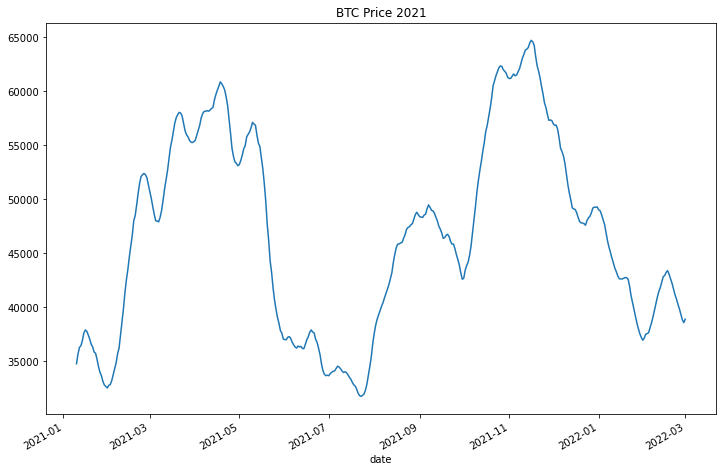

In [23]:
df_daily.rolling(10).close.mean().plot(figsize=(12,8), title='BTC Price 2021')

In [29]:
# Create batches of data, with sliding windows of n size and overlap of m size
def create_batches(df: DataFrame, n: int = 10, m: int = 5):
    for i in range(0, len(df) - n, m):
        yield df.iloc[i:i+n], df.iloc[i+n:i+n+m]

In [34]:
# Create batches of data, 2 weeks of data with 1 week overlap
train_batches = []
for batch in create_batches(df_daily, 14, 7):
    # Get close price and convert to numpy array
    train, pred = batch
    train_batches.append(train.close.to_numpy())

In [35]:
train_batches[:2]

[array([29083.47, 29355.7 , 32231.92, 32923.97, 32117.01, 34134.19,
        36927.97, 39426.25, 40696.39, 40415.45, 38113.81, 35400.  ,
        33873.28, 37693.32]),
 array([39426.25, 40696.39, 40415.45, 38113.81, 35400.  , 33873.28,
        37693.32, 39000.  , 37009.4 , 35836.35, 35908.08, 36882.05,
        35776.1 , 35614.52])]